<a href="https://colab.research.google.com/github/JonathaCosta/3_SmartGrid/blob/main/AEL%20/%20AEL1_AnaliseEnergeticaLocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do potencial energético na cidade de Fortaleza no intervalo de 5 anos e previsão para ano seguinte

**Métodos utilizados**: 
*   Séries Temporais
*   *Machine Learning* 
*   Rede Neural Recorrente



## Etapa 01 - Observações preliminares dos dados

Importar dados, tratar, converter em DataFrame e realizar análise prévia numérica e gráfica.

### Importação, tratamento e conversão


Fonte: https://tempo.inmet.gov.br/TabelaEstacoes/82397#

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
''' Importa os dados de 2021-2017, atualiza o index para data e altera os nomes das colunas '''

dados = pd.concat([pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd1_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd2_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd3_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd4_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd5_fortaleza.xlsx')])
dados = dados.set_index('Data')

dados.rename(columns={'Hora (UTC)':'hora', 'Temp. Ins. (C)':'tinst', 'Temp. Max. (C)': 'tmax', 'Temp. Min. (C)':'tmin',
       'Umi. Ins. (%)': 'uinst', 'Umi. Max. (%)':'umax', 'Umi. Min. (%)':'umin',
       'Pto Orvalho Ins. (C)':'poinst', 'Pto Orvalho Max. (C)':'pomax', 'Pto Orvalho Min. (C)':'pomin',
       'Pressao Ins. (hPa)':'pinst', 'Pressao Max. (hPa)':'pmax', 'Pressao Min. (hPa)':'pmin',
       'Vel. Vento (m/s)':'velven', 'Dir. Vento (m/s)':'dirven', 'Raj. Vento (m/s)':'rajven',
       'Radiacao (KJ/m²)':'radiacao', 'Chuva (mm)':'chuva'},inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39432 entries, 2017-01-01 to 2021-07-01
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hora      39432 non-null  int64  
 1   tinst     36866 non-null  float64
 2   tmax      36861 non-null  float64
 3   tmin      36861 non-null  float64
 4   uinst     36866 non-null  float64
 5   umax      36861 non-null  float64
 6   umin      36861 non-null  float64
 7   poinst    36866 non-null  float64
 8   pomax     36861 non-null  float64
 9   pomin     36861 non-null  float64
 10  pinst     36866 non-null  float64
 11  pmax      36861 non-null  float64
 12  pmin      36861 non-null  float64
 13  velven    36866 non-null  float64
 14  dirven    36866 non-null  float64
 15  rajven    36858 non-null  float64
 16  radiacao  21808 non-null  float64
 17  chuva     36866 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 5.7 MB


### Análise prévia dos dados

Medição total de radiação diária, semanal, mensal e anual para o intervalo de 5 anos


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39432 entries, 2017-01-01 to 2021-07-01
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hora      39432 non-null  int64  
 1   tinst     36866 non-null  float64
 2   tmax      36861 non-null  float64
 3   tmin      36861 non-null  float64
 4   uinst     36866 non-null  float64
 5   umax      36861 non-null  float64
 6   umin      36861 non-null  float64
 7   poinst    36866 non-null  float64
 8   pomax     36861 non-null  float64
 9   pomin     36861 non-null  float64
 10  pinst     36866 non-null  float64
 11  pmax      36861 non-null  float64
 12  pmin      36861 non-null  float64
 13  velven    36866 non-null  float64
 14  dirven    36866 non-null  float64
 15  rajven    36858 non-null  float64
 16  radiacao  21808 non-null  float64
 17  chuva     36866 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 5.7 MB


In [4]:
dados.head(10)

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
Data,,,,,,,,,,,,,,,,,,
2017-01-01,0,27.6,27.7,27.6,71.0,72.0,71.0,21.9,22.2,21.9,1009.0,1009.0,1008.5,2.1,104.0,5.9,NaN,0.0
2017-01-01,100,27.5,27.7,27.5,72.0,72.0,71.0,22.1,22.1,21.9,1009.1,1009.1,1009.0,2.3,101.0,6.9,NaN,0.0
2017-01-01,200,27.4,27.6,27.3,75.0,75.0,72.0,22.6,22.6,22.1,1009.1,1009.2,1009.0,2.6,107.0,6.9,NaN,0.0
2017-01-01,300,27.4,27.4,27.3,76.0,76.0,75.0,22.8,22.8,22.5,1008.7,1009.1,1008.6,3.2,105.0,7.0,NaN,0.0
2017-01-01,400,27.1,27.4,27.1,76.0,77.0,76.0,22.6,22.8,22.6,1007.8,1008.7,1007.8,2.2,105.0,7.0,NaN,0.0
2017-01-01,500,27.0,27.1,26.9,75.0,77.0,75.0,22.1,22.6,22.1,1007.5,1007.8,1007.5,2.9,111.0,6.6,NaN,0.0
2017-01-01,600,26.8,27.1,26.8,76.0,76.0,74.0,22.3,22.3,22.0,1007.2,1007.5,1007.2,1.9,115.0,6.6,NaN,0.0
2017-01-01,700,26.7,26.9,26.7,77.0,77.0,76.0,22.3,22.4,22.3,1007.1,1007.2,1007.0,1.9,114.0,5.3,NaN,0.0
2017-01-01,800,26.7,26.8,26.6,78.0,78.0,77.0,22.5,22.6,22.3,1007.6,1007.6,1007.0,1.5,135.0,4.3,NaN,0.0


In [5]:
dados.describe()

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
count,39432.000000,36866.000000,36861.000000,36861.000000,36866.000000,36861.000000,36861.000000,36866.000000,36861.000000,36861.000000,36866.000000,36861.000000,36861.000000,36866.000000,36866.000000,36858.000000,21808.000000,36866.000000
mean,1150.000000,27.240029,27.737891,26.777483,72.258938,74.485147,69.910013,21.524717,21.964225,21.100762,1009.439372,1009.692656,1009.188538,2.367461,124.800521,6.312703,1148.049086,0.183812
std,692.227433,2.286496,2.470042,2.105587,12.619306,11.693422,13.435076,1.602686,1.513831,1.717572,1.955032,1.942156,1.948195,1.376130,42.907075,2.842923,923.888322,1.350263
min,0.000000,20.600000,20.900000,20.400000,29.000000,33.000000,28.000000,11.100000,13.200000,10.700000,1002.500000,1002.700000,1002.400000,0.000000,1.000000,0.000000,0.010000,0.000000
25%,575.000000,25.600000,25.900000,25.300000,63.000000,67.000000,59.000000,20.700000,21.100000,20.200000,1008.000000,1008.300000,1007.800000,1.300000,98.000000,4.200000,188.725000,0.000000
50%,1150.000000,26.900000,27.200000,26.500000,74.000000,76.000000,72.000000,21.800000,22.100000,21.400000,1009.400000,1009.600000,1009.100000,2.400000,110.000000,6.500000,1061.125000,0.000000
75%,1725.000000,29.100000,29.900000,28.300000,81.000000,83.000000,79.000000,22.700000,23.000000,22.300000,1010.700000,1011.000000,1010.500000,3.400000,152.000000,8.400000,1937.007500,0.000000
max,2300.000000,33.600000,34.500000,32.900000,93.000000,93.000000,93.000000,26.100000,26.800000,25.100000,1016.400000,1016.800000,1016.300000,7.000000,360.000000,15.900000,3239.200000,50.800000


### Meses de maior concentração de radiação e chuva nos últimos 5 anos

Text(0.5, 1.0, 'Dispersão de Radiação mensal acumulada em 5 anos')

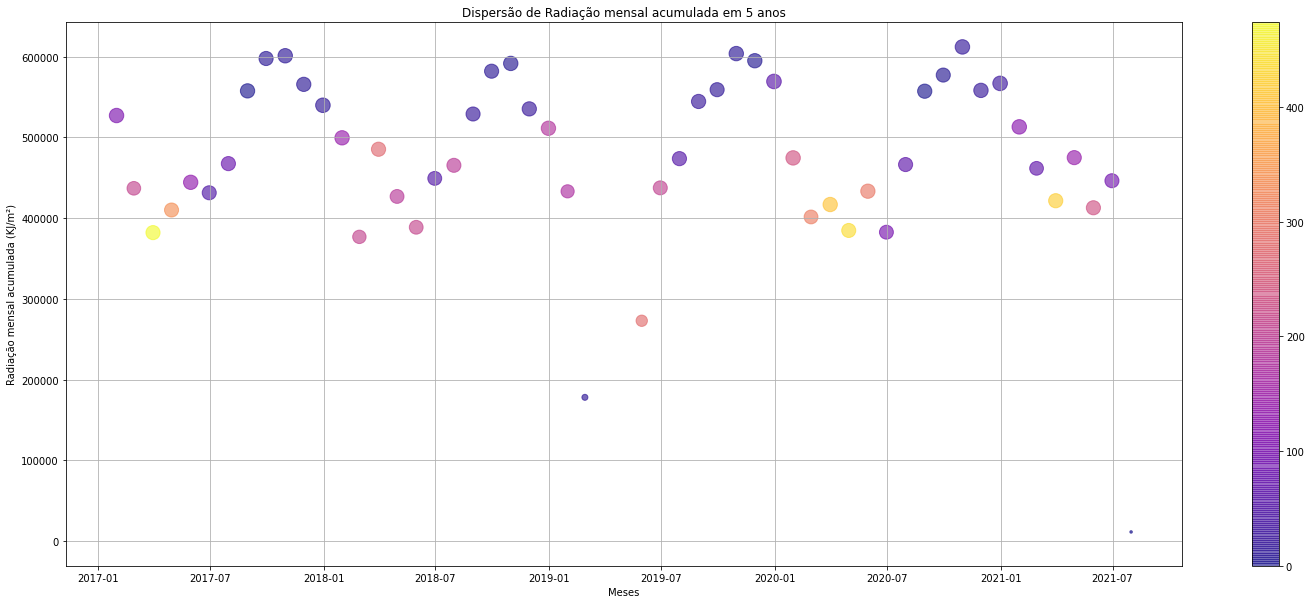

In [6]:
mes_df = dados.resample('M').sum()

plt.figure(figsize=(25,10))
plt.scatter(mes_df.index,mes_df.radiacao, c = mes_df.chuva, cmap='plasma', s = mes_df.tmax/1e2, alpha=0.6 )
plt.colorbar()
plt.grid()
plt.xlabel('Meses')
plt.ylabel('Radiação mensal acumulada (KJ/m²)')
plt.title('Dispersão de Radiação mensal acumulada em 5 anos')

### Meses de concentração de radiação - maior e menor

In [7]:
mes_df.tail()

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
Data,,,,,,,,,,,,,,,,,,
2021-03-31,855600,19819.0,20173.0,19481.8,58609.0,60023.0,57070.0,16723.4,17053.8,16416.4,748986.0,749195.0,748780.8,1182.3,98786.0,3535.0,421462.06,422.0
2021-04-30,828000,19712.4,20059.6,19377.3,54547.0,56150.0,52887.0,16196.8,16518.3,15904.0,725798.9,725987.2,725612.4,1394.4,95546.0,3816.1,474832.05,139.0
2021-05-31,855600,19692.8,20046.7,19359.1,57993.0,59511.0,56377.0,16425.3,16743.4,16134.6,750097.7,750288.6,749910.7,1268.0,111692.0,3558.9,412744.17,235.0
2021-06-30,828000,19479.2,19833.1,19137.1,52273.0,53991.0,50489.0,15447.5,15774.9,15132.7,726362.3,726529.2,726196.0,1449.4,94361.0,3900.1,446218.70,92.2
2021-07-31,27600,646.2,659.4,637.7,1863.0,1905.0,1804.0,543.6,552.0,535.5,24286.2,24292.0,24279.6,61.8,3053.0,160.2,11333.16,1.6


Text(0.5, 1.0, 'Meses de menor concentração de radiação')

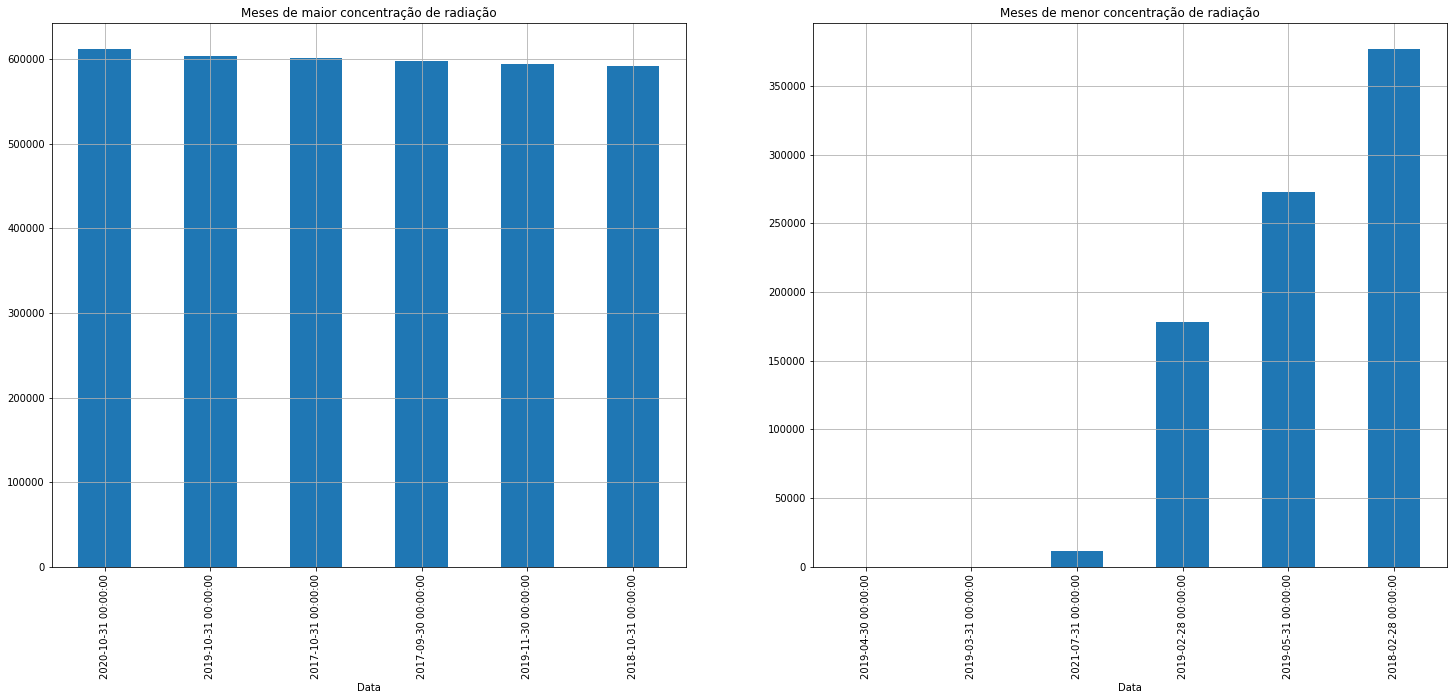

In [8]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
maior = mes_df.radiacao.sort_values(ascending=False).head(6)
maior.plot(kind='bar')
plt.grid()
plt.title('Meses de maior concentração de radiação')

plt.subplot(1,2,2)
menor = mes_df.radiacao.sort_values(ascending=True).head(6)
menor.plot(kind='bar')
plt.grid()
plt.title('Meses de menor concentração de radiação')


### Distribuição das frequências

Text(0, 0.5, 'Radiação acumulada mensal (KJ/m²)')

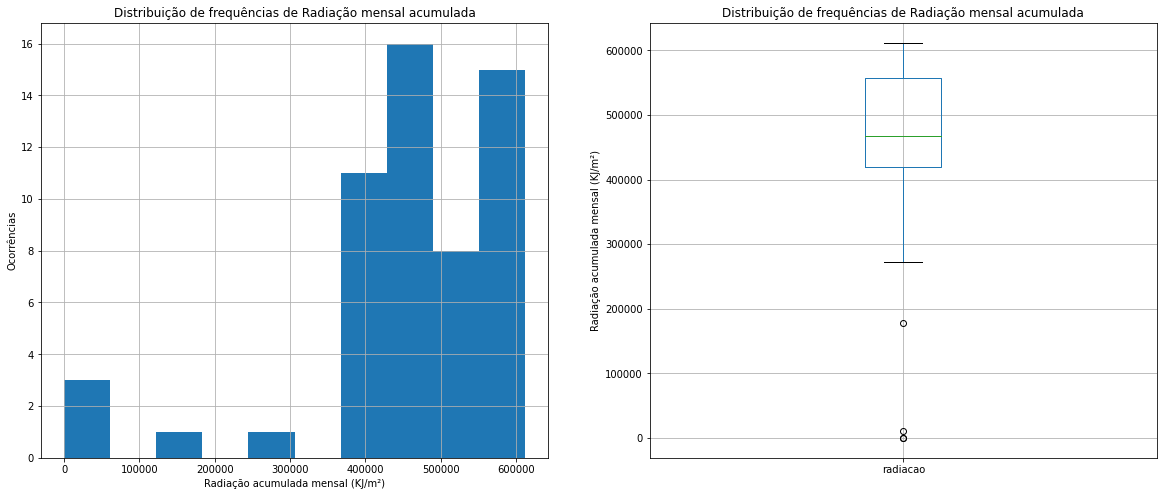

In [40]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
mes_df.radiacao.hist()
plt.title('Distribuição de frequências de Radiação mensal acumulada')
plt.xlabel('Radiação acumulada mensal (KJ/m²)')
plt.ylabel('Ocorrências')

plt.subplot(1,2,2)
mes_df.radiacao.plot(kind='box')
plt.grid()
plt.title('Distribuição de frequências de Radiação mensal acumulada')
plt.ylabel('Radiação acumulada mensal (KJ/m²)')


### Análise gráfica da radiação no quinquênio (2017-2021)

In [41]:
def AnaliseRadiacao(df):
  period = {'D':'diário','W':'semanal','M':'mensal','Y':'anual'}
  plt.figure(figsize=(30,10))

  for i,j in enumerate(period):
    a = df.resample(j).radiacao.sum()/1e3
    plt.subplot(2,2,i+1)
    a.plot()
    plt.ylabel('MJ/m²')
    plt.title('Período '+ period[j])
    plt.grid()
    

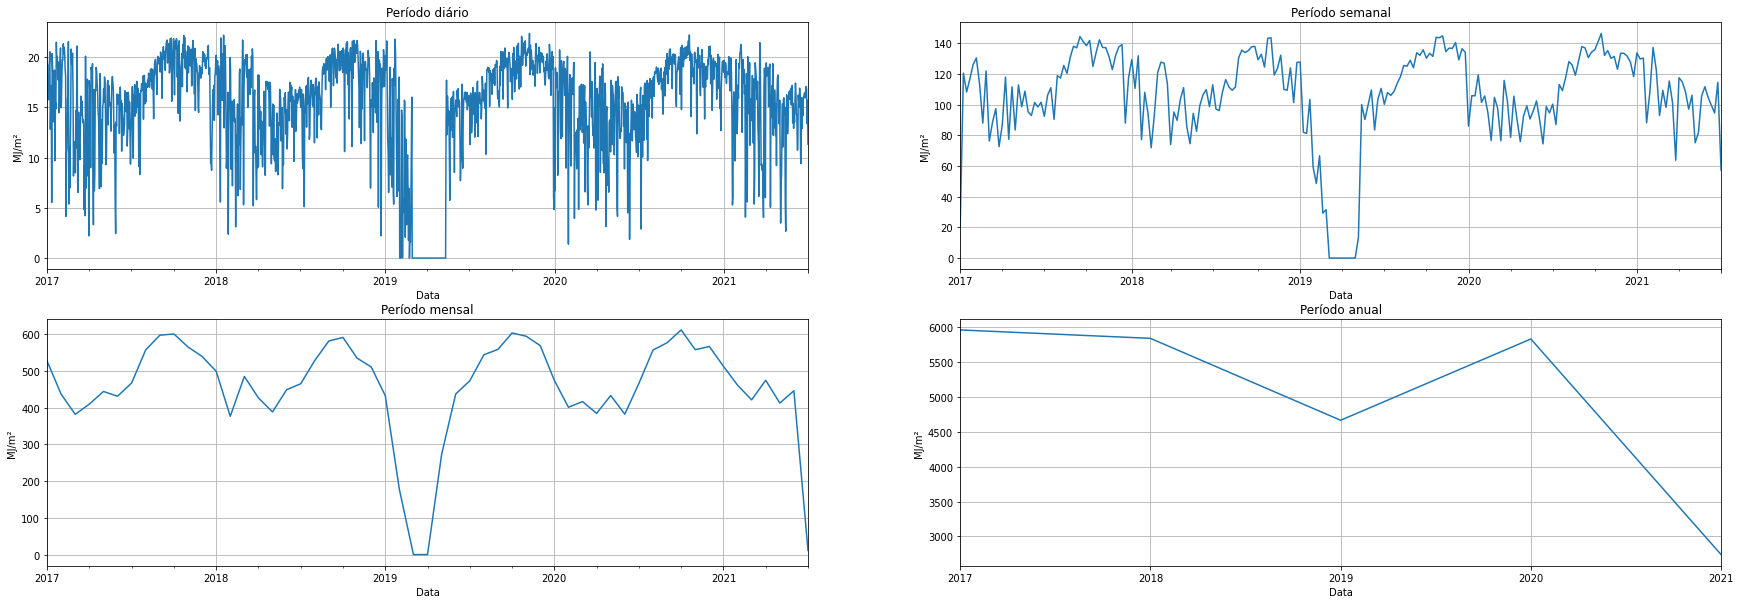

In [12]:
AnaliseRadiacao(dados)